In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import datetime, time
import requests
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
Here I collected the all intermediate object definitions. You can check functions for more detail.

y_data_orig : original prices over period, interval 1 hour [2021-09-16 00:00:00,2021-09-16 01:00:00 ... 2022-01-13 13:00:00,2022-01-13 13:40:00]

Values calculated from y_data_orig(all at price scale)
def convert_to_renko(y_data_orig):
y_data : average of ( high and low at that interval)
start_prices : open prices 
amplitude : index_high - index_low

Values calculated with ydata
def calculate_delta_diff(ydata,d_delta):
iterates over
for i, point in enumerate(ydata):
x_positive : indexes  where change with previous is over delta
y_positive : prices where change with previous is over delta
x_negative : indexes  where change with previous is less -1delta
y_negative : prices where change with previous is less -delta      

For the indexes of change calculate ,
#the indexes returned from here are indexes in the change history,
#Example : we have 2000+ data so x_pos will have indexes till 2000
#but we have only 50 delta points, then result of this function will have indexes in range 50
def data_to_regular(x_data,x_pos,x_neg,y_pos,y_neg):
iterates over
for i in x_data:
x_pos_regular = real position at prices history(if it is at index 100 means, 100 hours after 1st,our data is hourly)
x_neg_regular = ..
y_data_regular = values appendded from y_pos and y_neg according to their order
nextprice_pos_regular = price at next inteval ( start_prices[i+1] )
nextprice_neg_regular = ..
amplitude_pos_regular = current amplitude
amplitude_neg_regular =
x_data_regular = range object of values of count(change points) { x_data_regular = list(range(counter)) }

....
min_steps_ = consecutive periods we must a delta change in our data
Example : [100,101,101,110,120,130] think we have series like this and our threshold is %5
after index 3 we can say, we have 3 consequtive step that we see this change (101->110->120->130) all have change more than %5
N_amp_ : smoothing of a series of data

def get_strategy(x_positive_regular,x_negative_regular,amplitude_positive_regular,amplitude_negative_regular,y_positive,y_negative,nextprice_negative_regular,min_steps_,N_amp_):
iterating over only change points
for point in x_data_regular:

amplitude_progression : current amplitude from either negative or positive sides, some people use this as check to keep away from market on big changes
usd_progression : list  our buy/sell history gain
hold_progression : list of gains, what is we sell our initial btc now
buy_x : indexes that we do buy 
buy_y : which price(next price) we did our buy transaction
sell_x : indexes that we do sell 
sell_y : which price(next price) we sell our buy transaction



"""
""

''

In [3]:
#A candlestick chart, which details the open, high, low, and close would represent the price movements in this manner: Note the opening and closing prices in the body,
# and the upper and lower wicks denoting the highs and lows.
# A renko chart would represent things much more minimally

In [4]:
#url = "https://raw.githubusercontent.com/mcelikkaya/medium_articles3/main/bitcoin_091621_130122.csv"
#df  = pd.read_csv( url )

df  = pd.read_csv("D:/ml2022/bitcoin_091621_130122.csv")
df.head(5)

df.head(5)
df = df.set_index('Unnamed: 0')
df

Open          High           Low  \
Unnamed: 0                                                            
2021-09-16 00:00:00+00:00  48158.906250  48194.785156  47883.625000   
2021-09-16 01:00:00+00:00  47918.855469  48098.796875  47909.039062   
2021-09-16 02:00:00+00:00  48001.851562  48098.937500  47853.464844   
2021-09-16 03:00:00+00:00  47949.949219  47960.875000  47407.386719   
2021-09-16 04:00:00+00:00  47641.949219  48477.960938  47641.078125   
...                                 ...           ...           ...   
2022-01-13 10:00:00+00:00  43858.753906  43963.457031  43837.574219   
2022-01-13 11:00:00+00:00  43839.148438  43839.148438  43632.371094   
2022-01-13 12:00:00+00:00  43653.777344  43776.886719  43645.867188   
2022-01-13 13:00:00+00:00  43774.281250  43882.929688  43723.910156   
2022-01-13 13:40:00+00:00  43854.160156  43854.160156  43854.160156   

                                  Close     Adj Close      Volume  
Unnamed: 0                                                         
2021-09-16 00:00:00+00:00  47910.621094  47910.621094           0  
2021-09-16 01:00:00+00:00  48020.515625  48020.515625           0  
2021-09-16 02:00:00+00:00  47949.781250  47949.781250   261632000  
2021-09-16 03:00:00+00:00  47679.757812  47679.757812   474963968  
2021-09-16 04:00:00+00:00  48312.707031  48312.707031  1257926656  
...                                 ...           ...         ...  
2022-01-13 10:00:00+00:00  43837.574219  43837.574219  2496659456  
2022-01-13 11:00:00+00:00  43659.851562  43659.851562  3435601920  
2022-01-13 12:00:00+00:00  43776.886719  43776.886719  4669087744  
2022-01-13 13:00:00+00:00  43856.378906  43856.378906  2733260800  
2022-01-13 13:40:00+00:00  43854.160156  43854.160156           0  

[2814 rows x 6 columns]

In [5]:
#check data shape
y_data_orig = df.to_numpy()
print(y_data_orig.shape)

(2814, 6)


In [6]:
#some sample
print(y_data_orig[0:3])

[[4.81589062e+04 4.81947852e+04 4.78836250e+04 4.79106211e+04
  4.79106211e+04 0.00000000e+00]
 [4.79188555e+04 4.80987969e+04 4.79090391e+04 4.80205156e+04
  4.80205156e+04 0.00000000e+00]
 [4.80018516e+04 4.80989375e+04 4.78534648e+04 4.79497812e+04
  4.79497812e+04 2.61632000e+08]]


In [7]:
import plotly.graph_objects as go
#Dump as Candle Stick
fig = go.Figure(data=[go.Candlestick(x=df.index.array,open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

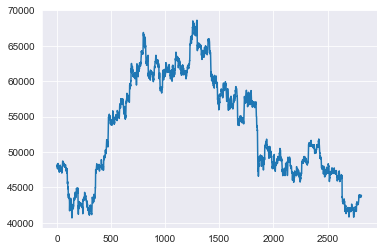

In [8]:
y_data_orig = df.to_numpy()
len2 = len(y_data_orig) // 2
len4 = len(y_data_orig) // 4

#Open below if you want to check only up or down markets

#to check only up trend
#y_data_orig = y_data_orig[:len2,:]

#to check only down trend
#y_data_orig = y_data_orig[len2:,:]

#to check more stable market
#y_data_orig = y_data_orig[len2 - 500:len2-200,:]

#_ = plt.plot( y_data_orig[:,0:1] )

_ = plt.plot( y_data_orig[:,0:1] )

In [9]:
#dump in a sample way


In [10]:
#calculate below values :
#y_data : average of ( high and low at that interval)
#start_prices : open prices 
#amplitude : index_high - index_low
def convert_to_renko(y_data_orig):
  index_open 	= 0
  index_high = 1
  index_low = 2
  index_close = 3

  y_data = []
  start_prices = []
  amplitude = []
  for row_data in y_data_orig:    
    y_data.append(np.average([float(row_data[index_high]), float(row_data[index_low])]))
    start_prices.append(float(row_data[index_open]))
    amplitude.append(float(row_data[index_high])-float(row_data[index_low]))
  return y_data,  start_prices,amplitude


In [11]:
#convert some sample data
y_data,  start_prices,amplitude = convert_to_renko(y_data_orig)
print("y_data :",y_data[0:5])
print("start_prices :",start_prices[0:5])
print("amplitude :",amplitude[0:5])

y_data : [48039.205078125, 48003.91796875, 47976.201171875, 47684.130859375, 48059.51953125]
start_prices : [48158.90625, 47918.85546875, 48001.8515625, 47949.94921875, 47641.94921875]
amplitude : [311.16015625, 189.7578125, 245.47265625, 553.48828125, 836.8828125]


In [12]:
#find where there are changes over delta
#Example : series [100, 101, 110]
# 100-> 101 is a %1 change 101 -> 110 nearly %10 ,so add second transition to set
#x_positive : indexes  where change with previous is over delta
#y_positive : prices where change with previous is over delta
#x_negative : indexes  where change with previous is less -1delta
#y_negative : prices where change with previous is less -delta  
def calculate_delta_diff(ydata,d_delta):
  pre = ydata[0] # first datapoint
  increment = 0
  x_positive,y_positive,x_negative,y_negative = [],[],[],[]
  # generate d_delta% change points
  for i, point in enumerate(ydata):
    #calculate difference of current line with previous
    increment += point-pre
    #calculate ratio of change
    increment_perc = increment/pre
    pre = point
    #if change > +delta or -delta add x_positive or x_negative
    if increment_perc > d_delta:
        x_positive.append(i)
        y_positive.append(point)
        increment = 0
    if increment_perc < -d_delta:
        x_negative.append(i)
        y_negative.append(point)
        increment = 0
  return x_positive,y_positive,x_negative,y_negative       
 

In [13]:
#Go over whole prices, add them to a list where there is change,
#this way their indexes(counter) are continous, for positive and negatives
#x_pos indexes are indexes in all data
#the indexes returned from here are indexes in the change history,
#Example : we have 2000+ data so x_pos will have indexes till 2000
#but we have only 50 delta points, then result of this function will have indexes in range 50
#x_pos_regular = real position at prices history(if it is at index 100 means, 100 hours after 1st,our data is hourly)
#x_neg_regular = ..
#y_data_regular = values appendded from y_pos and y_neg according to their order
#nextprice_pos_regular = price at next inteval ( start_prices[i+1] )
#nextprice_neg_regular = ..
#amplitude_pos_regular = current amplitude
#amplitude_neg_regular =
#x_data_regular = range object of values of count(change points) { x_data_regular = list(range(counter)) }
def data_to_regular(x_data,x_pos,x_neg,y_pos,y_neg):
  x_pos_regular = []
  x_neg_regular = []
  y_data_regular = []
  nextprice_pos_regular = []
  nextprice_neg_regular = []
  amplitude_pos_regular = []
  amplitude_neg_regular = []
  counter = 0
  for i in x_data:
      if i in x_pos:
          #position in prices history(if it is at index 100 means, 100 hours after 1st,our data is hourly)
          x_pos_regular.append(counter)
          #this value in y_pos array
          y_data_regular.append(y_pos[np.argwhere(np.array(x_pos)==i)[0][0]])
          #price at next inteval
          nextprice_pos_regular.append(start_prices[i+1])
          #current amplitude
          amplitude_pos_regular.append(amplitude[i])
          counter += 1
      elif i in x_neg:
          x_neg_regular.append(counter)
          #this value in y_neg array
          y_data_regular.append(y_neg[np.argwhere(np.array(x_neg)==i)[0][0]])
          nextprice_neg_regular.append(start_prices[i+1])
          amplitude_neg_regular.append(amplitude[i])
          counter += 1
      else:
        pass
        #print("data is not at delta change point")    
  x_data_regular = list(range(counter))
  return x_data_regular, y_data_regular,x_pos_regular,x_neg_regular,nextprice_pos_regular,amplitude_pos_regular,amplitude_pos_regular,amplitude_neg_regular,nextprice_neg_regular

In [14]:
# initial budget
budget = 100 # dolars
min_steps = 1

In [15]:
init_holding = budget/y_data[0] #btc
end_holding = init_holding*y_data[-1] #usd
print(end_holding)
print(init_holding)

91.28827191234959
0.0020816331127330775


In [16]:
#min_steps_ = consecutive periods we must a delta change in our data
#Example : [100,101,101,110,120,130] think we have series like this and our threshold is %5
#after index 3 we can say, we have 3 consequtive step that we see this change (101->110->120->130) all have change more than %5
#amplitude_progression : current amplitude from either negative or positive sides, some people use this as check to keep away from market on big changes
#usd_progression : list  our buy/sell history gain
#hold_progression : list of gains, what is we sell our initial btc now
#buy_x : indexes that we do buy 
#buy_y : which price(next price) we did our buy transaction
#sell_x : indexes that we do sell 
#sell_y : which price(next price) we sell our buy transaction

#def get_strategy(x_positive_regular,x_negative_regular,amplitude_positive_regular,
#                amplitude_negative_regular,y_positive,y_negative,nextprice_negative_regular,
#                min_steps_,N_amp_,dump_logs=False):
def get_strategy(x_data_regular,nextprice_positive_regular,x_positive_regular,x_negative_regular,amplitude_positive_regular
                 ,amplitude_negative_regular,y_positive,y_negative,nextprice_negative_regular,
                 min_steps_,N_amp_,dump_logs=False):
  print("Running for min_steps_,N_amp_",min_steps_,N_amp_)
  usd = 0
  #how many btc we can buy at the beginning
  btc = budget/y_data[0]
  print(f"With budget {budget} usd {usd} , initial btc {btc} ")
  uptrend = 0
  downtrend = 0
  cur_price = y_data[0]
  buy_x = []
  buy_y = []
  sell_x = []
  sell_y = []
  y_data_regular = []
  holding_value = []
  algo_value = []
  buy_sell_steps = 0
  usd_progression = []
  hold_progression = []
  amplitude_progression = []
 
  amplitude_threshold = 100000000
  #print(f"Iterating over x_data_regular with len {len(x_data_regular)}")
  for point in x_data_regular:
      
      # assign trend
      if point in x_positive_regular:
          uptrend += 1
          downtrend = 0
          #if uptrend get values of current direction as below
          point_index = np.argwhere(np.array(x_positive_regular)==point)[0][0]
          cur_price = y_positive[point_index]
          cur_amplitude = amplitude_positive_regular[point_index]
          next_price = nextprice_positive_regular[point_index]
          y_data_regular.append(cur_price)
          
      elif point in x_negative_regular:
          downtrend += 1
          uptrend = 0
          point_index = np.argwhere(np.array(x_negative_regular)==point)[0][0]
          cur_price = y_negative[point_index]
          cur_amplitude = amplitude_negative_regular[point_index]
          next_price = nextprice_negative_regular[point_index]
          y_data_regular.append(cur_price)
          
          
  
      
      amplitude_progression.append(cur_amplitude)
      #print("amplitude_progression shape", amplitude_progression ) 
      last_amp = np.convolve(amplitude_progression, np.ones((N_amp_,))/N_amp_, mode='valid')[-1]
      if last_amp > amplitude_threshold:
        print("*********************last_amp over threshold",last_amp)
      #print("last_amp shape",last_amp)
      #print("cur_amplitude",cur_amplitude,"last_amp ",last_amp)
      # buy
      if uptrend == min_steps_:
          # uptrend = 0
          # downtrend = 0          
          buy_sell_steps +=1
          if usd > 0 and last_amp < amplitude_threshold:
              #we decided to buy , we use our money(usd) and buy from next price(because we decide to buy now)
              btc = (usd*0.999)/next_price
              usd = 0              
              #calculate our hold asset,what if we sell initial btc with next price
              hold_p = (budget/y_data[0])*next_price
              hold_progression.append(hold_p)
              #put the value of fresh bought btc with next price
              usd_p = btc*next_price              
              if dump_logs:
                print(f"buy hold_p {hold_p} usd_p {usd_p}")
              usd_progression.append(usd_p)
              buy_x.append(point)
              buy_y.append(next_price)
          else:
            if dump_logs:
              print(f"No usd remaining usd {usd} btc {btc} last_amp {int(last_amp)}") 
            if hold_progression : #empty when no hold
                hold_progression.append( hold_progression[-1])
            if usd_progression:
                usd_progression.append( usd_progression[-1 ])
          
      # sell
      elif downtrend == min_steps_:
          buy_sell_steps +=1
          if btc > 0 and last_amp < amplitude_threshold:
              usd = (btc*0.999)*next_price
              btc = 0
              #calculate our hold asset,what if we sell initial btc with next price
              hold_p = (budget/y_data[0])*next_price
              if dump_logs:
                print(f"sell hold_p {hold_p} usd {usd}")
              hold_progression.append(hold_p)
              usd_progression.append(usd)
              sell_x.append(point)
              sell_y.append(next_price)
          else:
            if dump_logs:
              print(f"No btc remaining usd {usd} btc {btc} last_amp {int(last_amp)}")   
            hold_progression.append( hold_progression[-1])
            usd_progression.append( usd_progression[-1 ])     
      else:
          #budget/y_data[0] : hoy many btc do we have at the beginning
          #next_price : when multiplied with initial btc with next price, we find hodling value of our assets 
          hold_p = (budget/y_data[0]) * next_price
          hold_progression.append(hold_p)
          
          #when we dont meet above conditions,we cannot do any sell or buy,so we have equal usd and hold
          if btc > 0:#if we have btc
              usd_progression.append(btc*next_price)
              #btc > 0 hold_p 947.4099381637061 btc*next_price 947.4099381637061 budget 1000 ydata 48039.205078125 btc 0.020816331127330775 next_price 45512.8203125 usd 0 
              if dump_logs:
                print(f"btc > 0 hold_p {hold_p} btc*next_price {btc*next_price} budget {budget} ydata {y_data[0]} btc {btc} next_price {next_price} usd {usd} buy_sell_steps {buy_sell_steps}")
          elif usd > 0:
               if dump_logs:
                 print(f"usd > 0 hold_p {hold_p} usd { usd} ")
               usd_progression.append(usd)
      
      # algo value
      if usd > 0:
          algo_value.append(usd)
      elif btc > 0:
          algo_value.append(btc*next_price)
          
      # holding value
      holding_value.append(init_holding*next_price)
          
  #our parameters are so bad that above codes not executed and next_price is None
  #assign a price 
  try:
    next_price
  except:    
    next_price = y_data[0] #nextprice_positive_regular[0]
    
  end_usd = max(usd, btc*next_price)
  if dump_logs:
    print(f"USD final: {round(end_usd,2)}  Hodling {round(end_holding,2)} " )
  gain_renko = round((end_usd/end_holding)*100)
  if dump_logs:
    print(f"Gain Renko over hodling  {gain_renko} ")
  return amplitude_progression,usd_progression,hold_progression,buy_x, buy_y,sell_x, sell_y ,end_usd,gain_renko

In [17]:
def draw_trading(usd_progression,hold_progression,amp,symbol,budget,plt):  
  #plt.figure(figsize=(12,6))  
  plt.plot(usd_progression,  label="Renko Trade" )
  plt.plot(hold_progression, 'b--', label="Holding" )
  plt.plot(amp, "--", label="Volatility")
  plt.legend(fontsize=14)
  plt.set_title(symbol, fontsize=14, fontweight=600)
  plt.set_xlabel("Renko points delta variation on price)", fontsize=14 ,fontweight=600)
  plt.set_ylabel("USDT for every {} USDT invested".format(budget), fontsize=14, fontweight=600)  

def draw_buysell(x_data_regular, y_data_regular,x_positive_regular,x_negative_regular, y_positive,y_negative,buy_x, buy_y,sell_x, sell_y,plt):
  #plt.figure(figsize=(12,6))
  plt.plot(x_data_regular, y_data_regular, '-', color="grey")
  plt.plot(x_positive_regular, y_positive, "o", color="green", markersize=4)
  plt.plot(x_negative_regular, y_negative, "o", color="red", markersize=4)
  plt.plot(buy_x, buy_y, "o", color="blue", markersize=10, label="buy BTC")
  plt.plot(sell_x, sell_y, "o", color="black", markersize=10, label="sell BTC")
  plt.legend(fontsize=12)
  plt.set_xlabel("Renko points", fontsize=12, fontweight=600)
  plt.set_ylabel("Dollars ", fontsize=12, fontweight=600)    

#TODO delete other method
def draw_renko(x_orig,y_orig,x_pos,y_pos,x_neg,y_neg,nextprice_positive_regular,d_delta,plt):
  #plt.figure(figsize=(12,6))
  plt.plot(x_orig, y_orig, "-",color="black",label="Trend")
  plt.plot(x_pos, y_pos, "o", color="green", label="price went up {}%".format(d_delta*100))
  plt.plot(x_neg, y_neg, "o", color="red", label="price went down {}%".format(d_delta*100))
  plt.set_ylabel("Dollars ", fontsize=12, fontweight=600)
  plt.set_xlabel("Days ago", fontsize=12, fontweight=600)
  plt.plot(x_pos, nextprice_positive_regular, "o", label="Next Price")
  
  plt.legend(fontsize=12)  



In [18]:
def run_for(delta,step,amp_):
  x_positive,y_positive,x_negative,y_negative = calculate_delta_diff(y_data, d_delta=delta)
  x_data = np.array( list( range(len(y_data)) ))
  x_data_regular, y_data_regular,x_positive_regular,x_negative_regular,nextprice_positive_regular,amplitude_positive_regular,amplitude_positive_regular,amplitude_negative_regular,nextprice_negative_regular = data_to_regular(x_data,x_positive,x_negative,y_positive,y_negative)
  
  
  # Params delta :0.03 step:4 amp:5 

  #check_combinations = list(itertools.product(steps, amps))
  
  
  
  title = f" Params delta :{delta} step:{step} amp:{N_amp_} "
  budget = 100
  fig,axes = plt.subplots(1,3)
  fig.set_size_inches(21,6)
  draw_renko(x_data_regular,y_data_regular,x_positive_regular,y_positive,x_negative_regular,y_negative,nextprice_positive_regular, d_delta=delta,plt=axes[0])
  amplitude_progression,usd_progression,hold_progression,buy_x, buy_y,sell_x, sell_y,end_usd,gain_renko = get_strategy(x_data_regular,nextprice_positive_regular,x_positive_regular,x_negative_regular,
                                                                                                      amplitude_positive_regular,amplitude_negative_regular,
                                                                                                      y_positive,y_negative,nextprice_negative_regular,
                                                                                                      min_steps_=step,N_amp_=N_amp_,dump_logs=False)  
  
                                                                       
  # moving average amplitude
  amp_raw = [t/20 for t in amplitude_progression] # I reduce amplitude arbitrarily to fit in the plot scale
  amp = np.convolve( amp_raw, np.ones((N_amp_,))/N_amp_, mode='full')
  #print(amp)    
  draw_trading(usd_progression,hold_progression,amp,title,budget,axes[1])
  draw_buysell(x_data_regular, y_data_regular,x_positive_regular,x_negative_regular, y_positive,y_negative,buy_x, buy_y,sell_x, sell_y,axes[2])
  return end_usd,gain_renko,f" delta :{delta} step:{step} amp:{N_amp_} "

---------------------   Params delta :0.01 step:1 amp:10 
Running for min_steps_,N_amp_ 1 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.01 step:2 amp:10 
Running for min_steps_,N_amp_ 2 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.01 step:4 amp:10 
Running for min_steps_,N_amp_ 4 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.02 step:1 amp:10 
Running for min_steps_,N_amp_ 1 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.02 step:2 amp:10 
Running for min_steps_,N_amp_ 2 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.02 step:4 amp:10 
Running for min_steps_,N_amp_ 4 10
With budget 100 usd 0 , initial btc 0.0020816331127330775 
---------------------   Params delta :0.03 step:1 amp:10 
Running for min_steps_,N_amp_ 

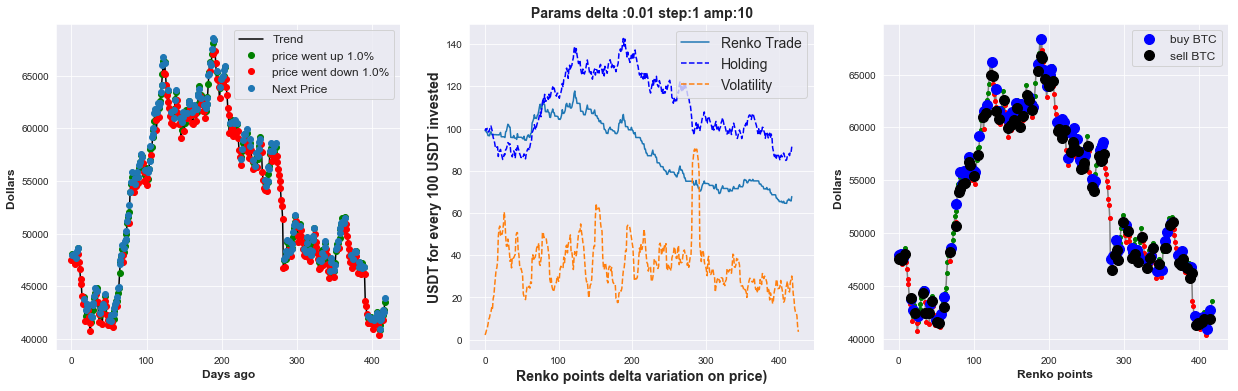

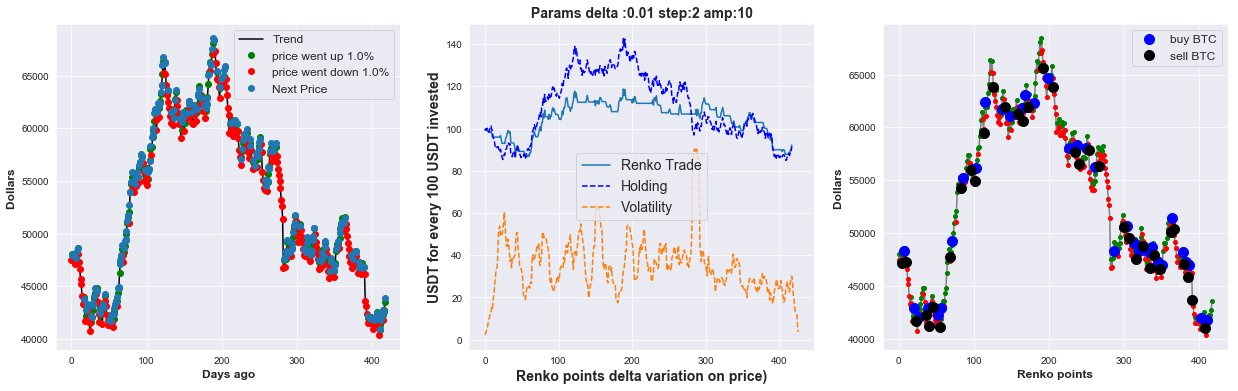

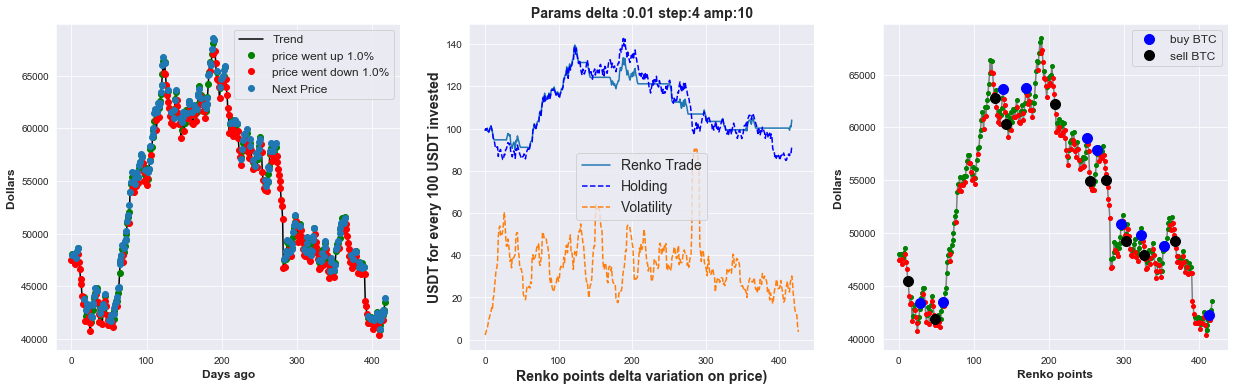

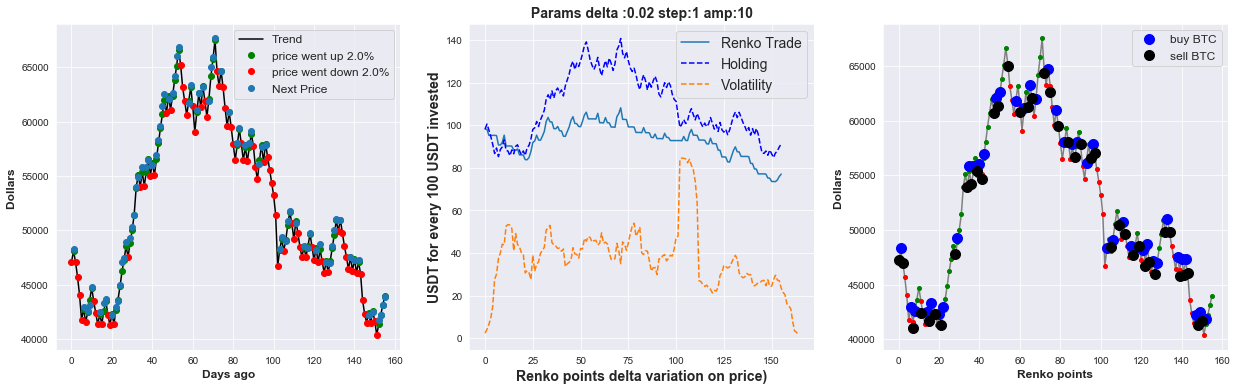

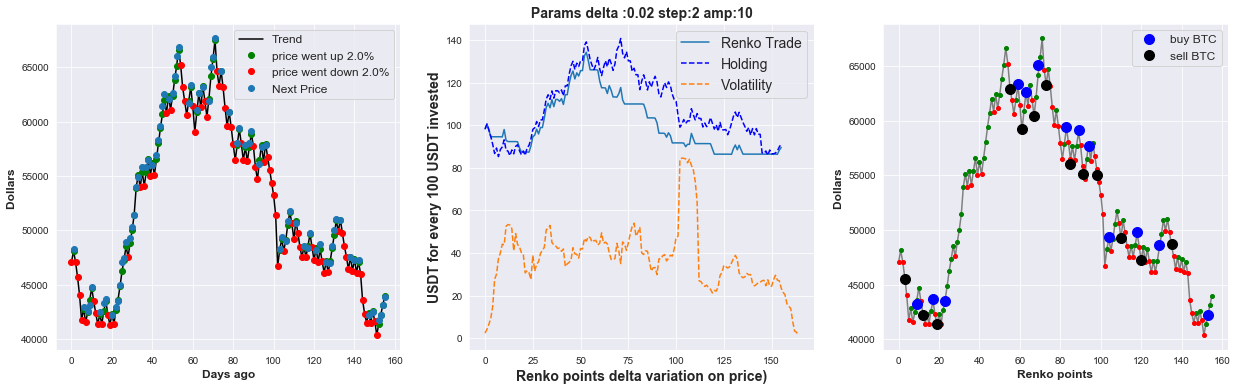

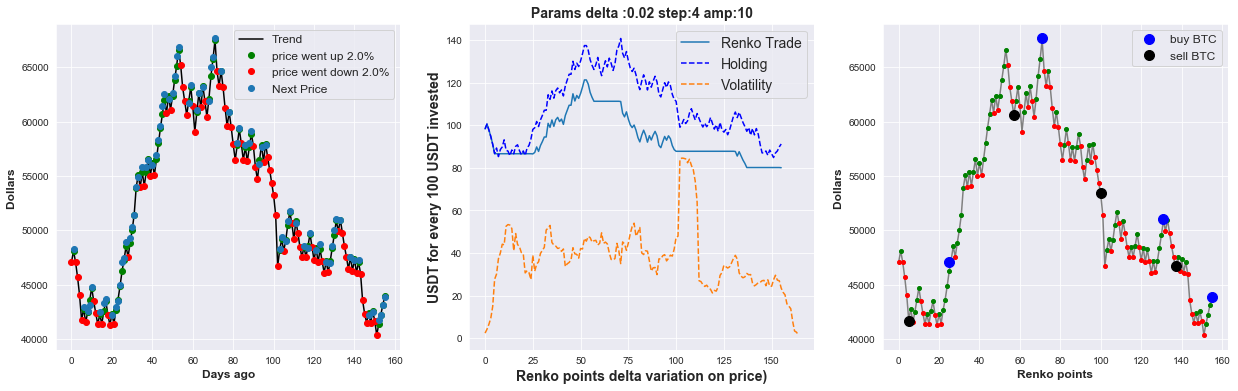

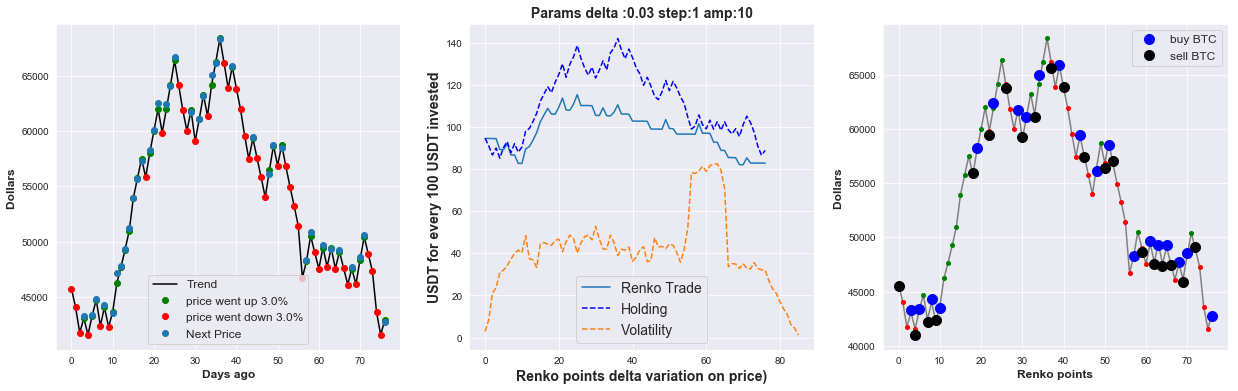

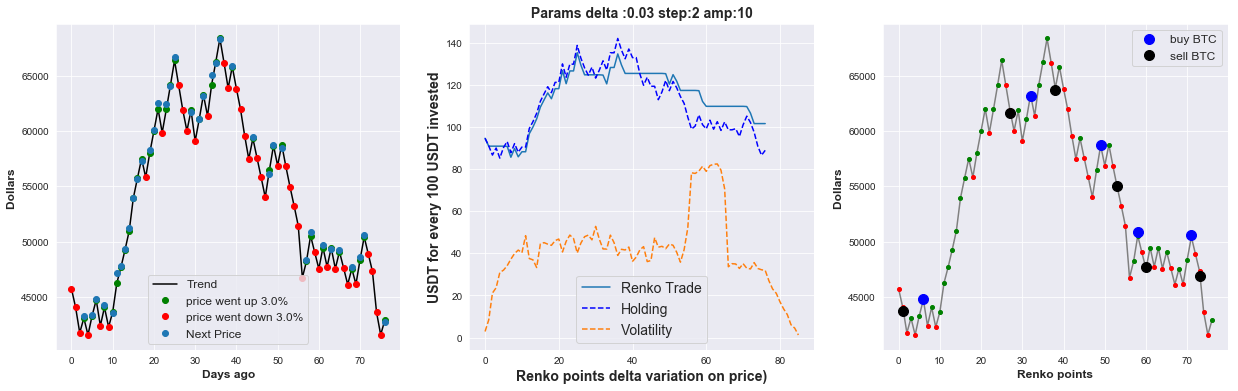

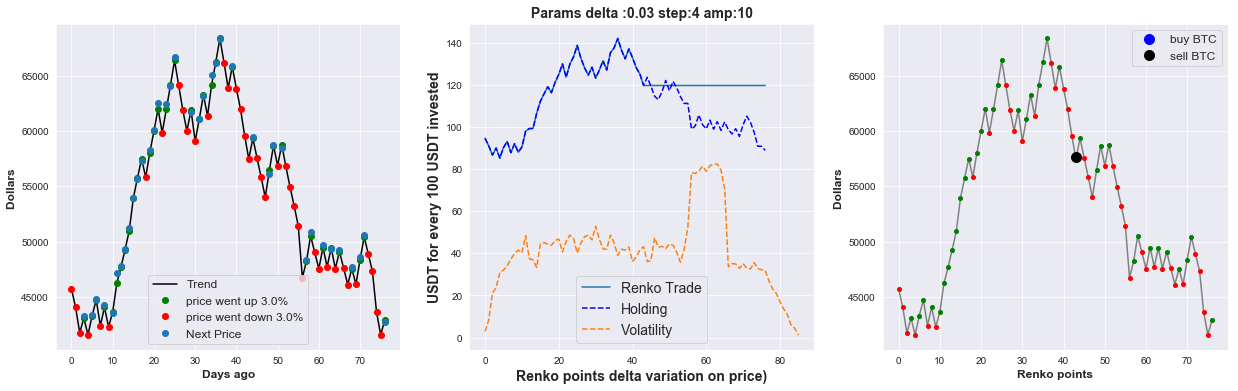

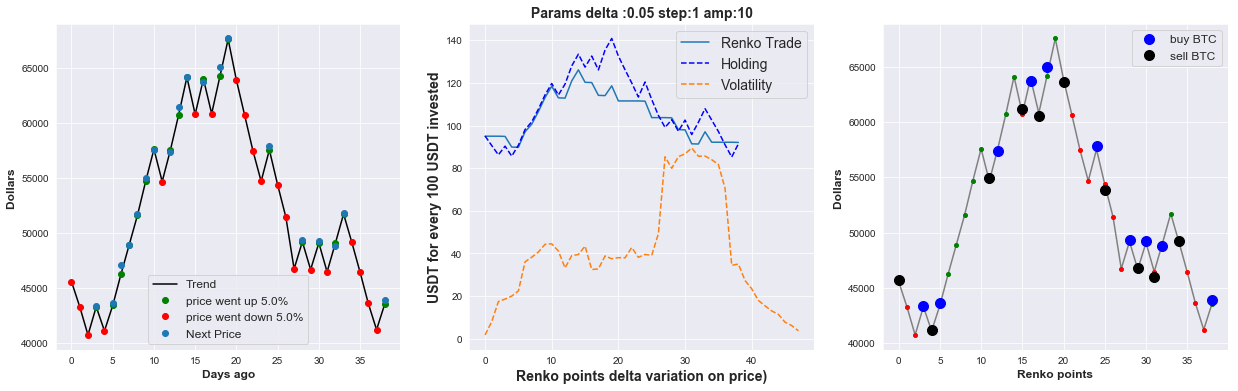

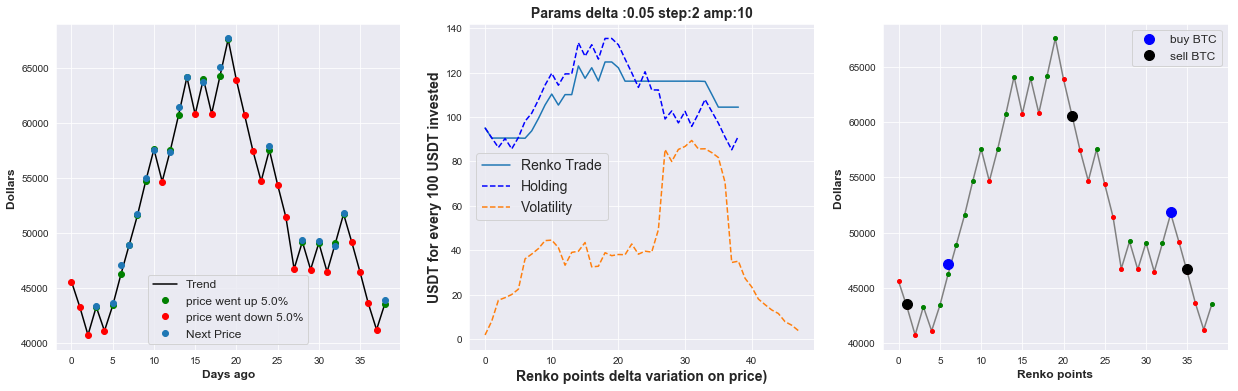

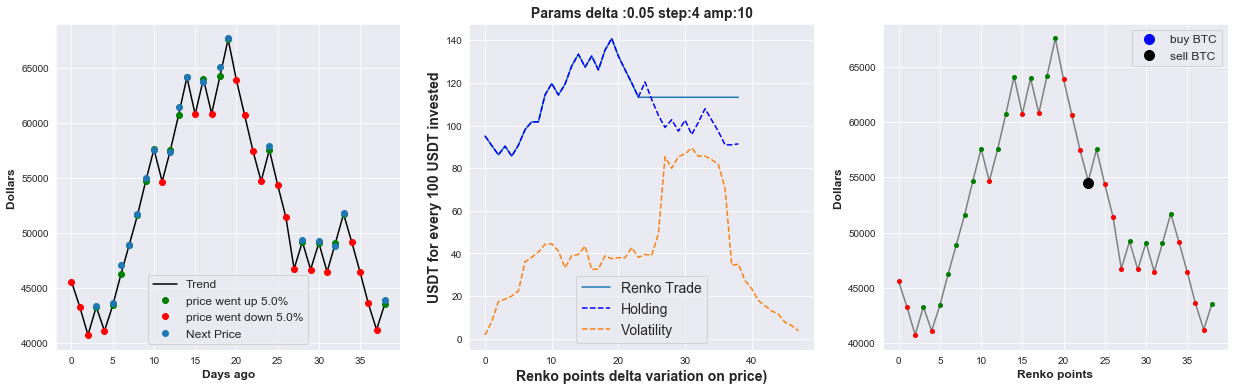

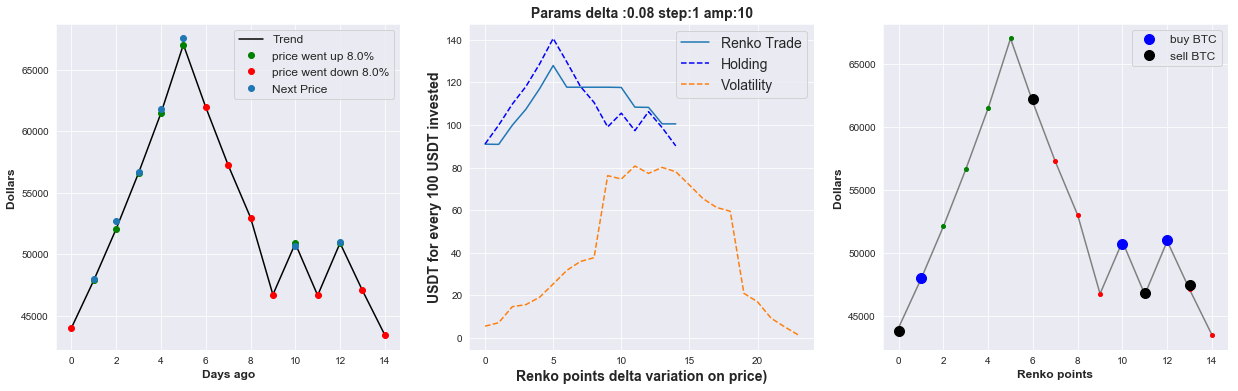

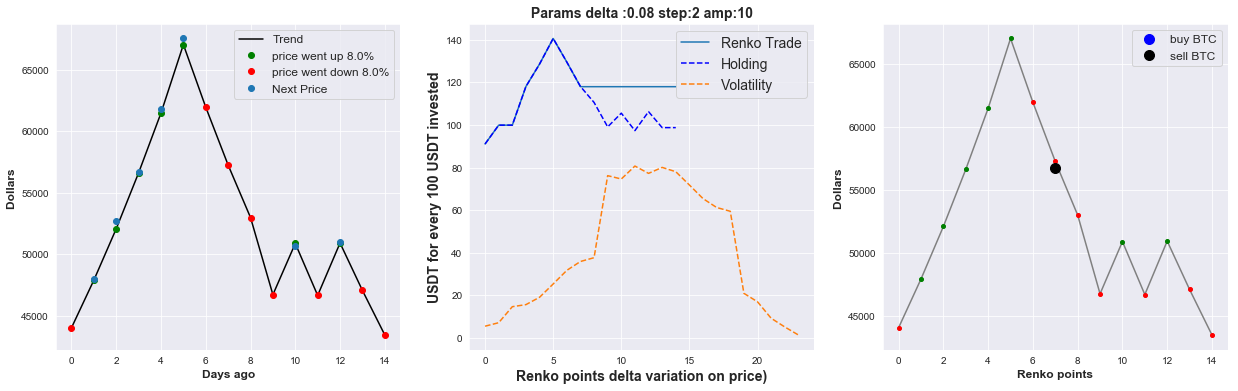

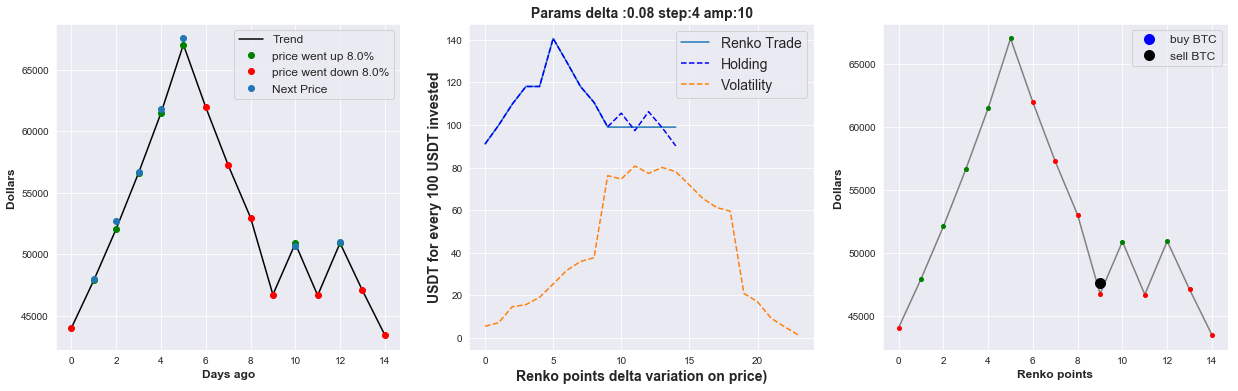

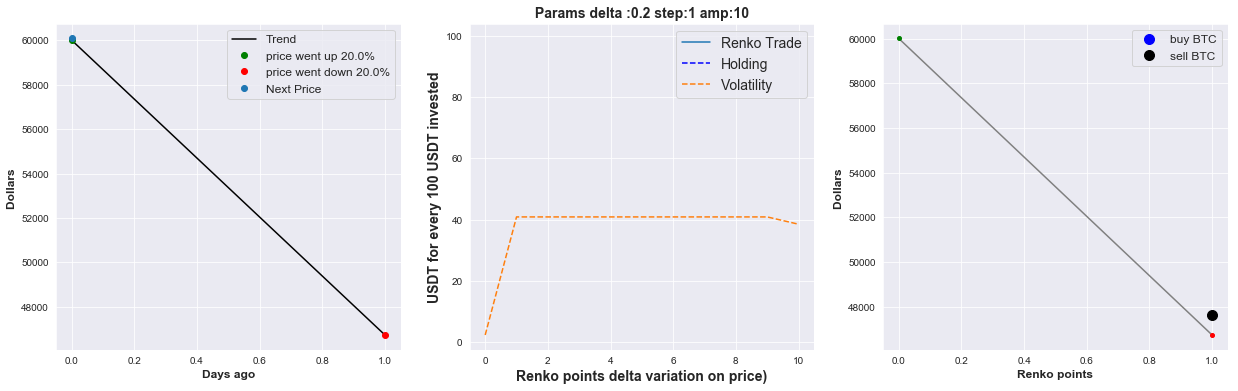

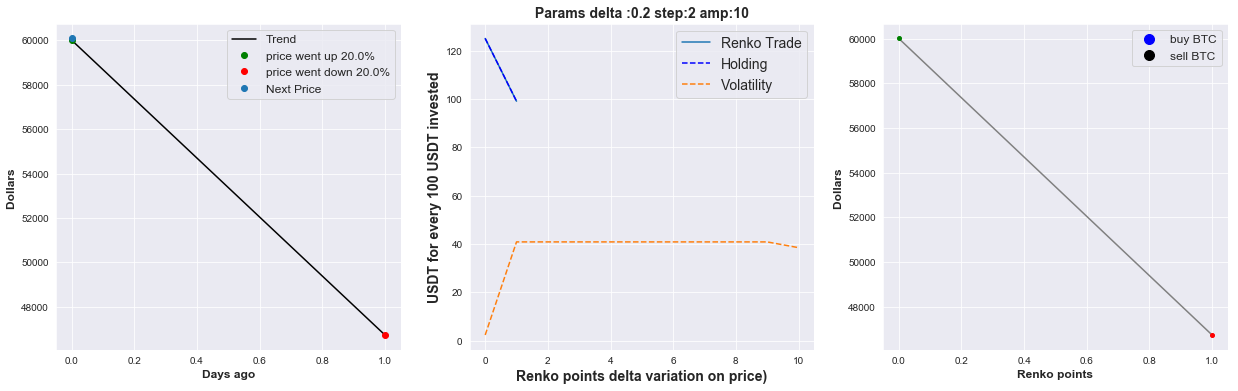

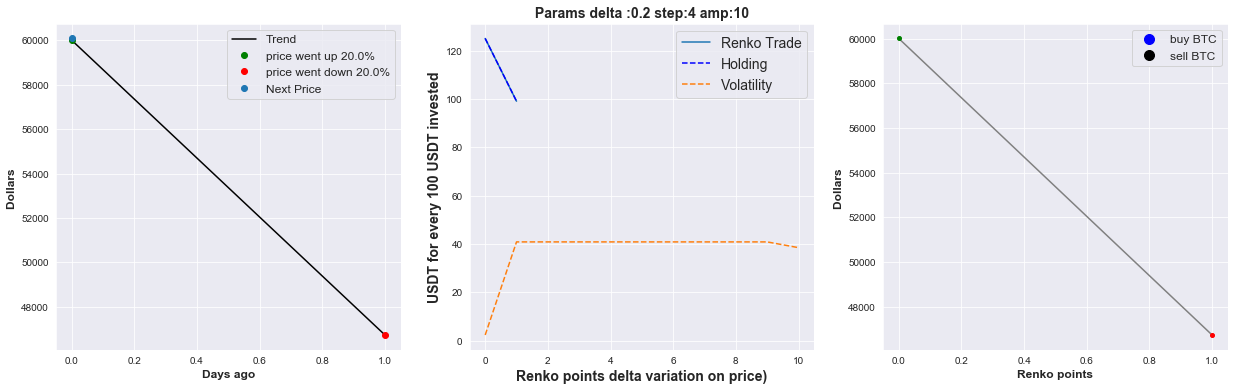

In [19]:
import itertools
deltas = [0.01,0.02,0.03,0.05,0.08,0.2] #
final_usds = []
final_gains = []
params_iterations = []
for delta in  deltas:  
  # Params delta :0.03 step:4 amp:5 
  steps = [1,2,4] #1,2,4
  amps = [10]

  check_combinations = list(itertools.product(steps, amps))
  for comb in check_combinations:
    step = comb[0]
    N_amp_  = comb[1]
    title = f" Params delta :{delta} step:{step} amp:{N_amp_} "
    print("--------------------- ",title)
    budget = 100
    #end_usd,gain_renko,title_ = run_for(delta,step,N_amp_)
    try:
        end_usd,gain_renko,title_ = run_for(delta,step,N_amp_)
        final_usds.append(end_usd)
        final_gains.append(gain_renko)
        params_iterations.append( title_)
    except:    
        print("Combination had an error ",title)
    
    

In [20]:
import pandas as pd
df_summary = pd.DataFrame()
df_summary["Title"] = params_iterations
df_summary["Gain"] = final_gains
df_summary

Title  Gain
0    delta :0.01 step:1 amp:10     74
1    delta :0.01 step:2 amp:10    101
2    delta :0.01 step:4 amp:10    114
3    delta :0.02 step:1 amp:10     84
4    delta :0.02 step:2 amp:10     98
5    delta :0.02 step:4 amp:10     88
6    delta :0.03 step:1 amp:10     91
7    delta :0.03 step:2 amp:10    111
8    delta :0.03 step:4 amp:10    131
9    delta :0.05 step:1 amp:10    101
10   delta :0.05 step:2 amp:10    114
11   delta :0.05 step:4 amp:10    124
12   delta :0.08 step:1 amp:10    110
13   delta :0.08 step:2 amp:10    129
14   delta :0.08 step:4 amp:10    108
15    delta :0.2 step:1 amp:10    108
16    delta :0.2 step:2 amp:10    109
17    delta :0.2 step:4 amp:10    109

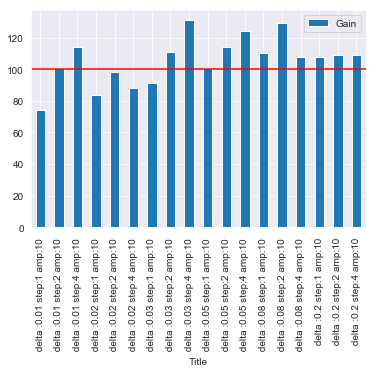

In [21]:

ax = df_summary.plot.bar(x="Title",y="Gain")
ax.axhline(y=100, color='r', linestyle='-')

In [22]:
#plt.plot(amp,label="Amplitude Smoothed")
#plt.plot(amp_raw,label="Amplitude Raw")
#plt.title("Window :"+str(N_amp_))
#plt.legend()